### Simple example to display how dbscan works 

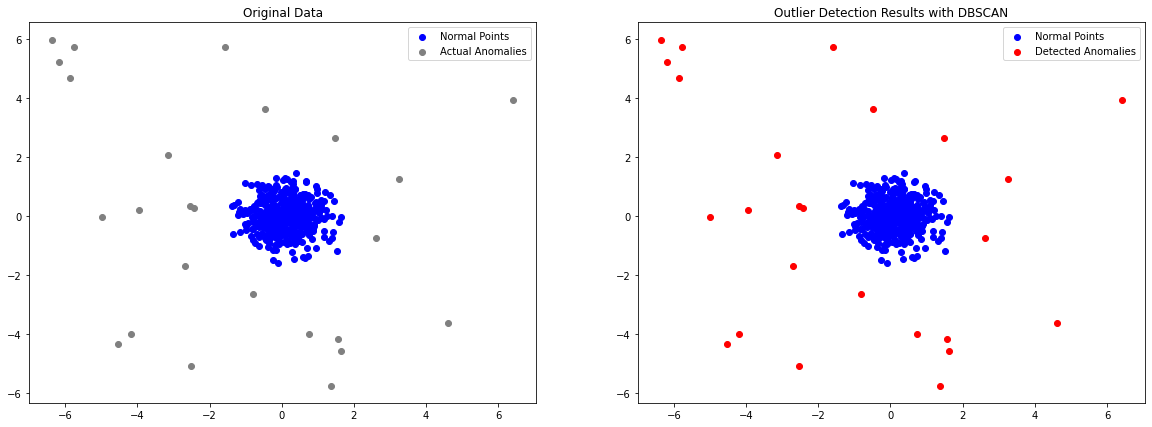

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 500
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Generate inliers using a blob generator
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
data = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0]

# Generate outliers data
rng = np.random.RandomState(42)
outliers = rng.uniform(low=-6, high=6, size=(n_outliers, 2))

# concatenate both inliers and outliers in the data variable
data = np.concatenate([data, outliers], axis=0)

# scale the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# fit the model
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(data)


# Mark the core and border points as inliers (1), and noise points (outliers) as (-1)
outlier_labels = np.where(db_labels == -1, -1, 1)



# Create a dataframe for easier data manipulation
df = pd.DataFrame(data, columns = ['x1', 'x2'])
df['anomaly'] = outlier_labels


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 7))


# Plot the normal points
normal_points = df[df['anomaly'] == 1]
# Plot the anomalies
anomalies = df[df['anomaly'] == -1]

# Plot original data
axs[0].scatter(df['x1'][:n_inliers], df['x2'][:n_inliers], color='b', label='Normal Points')
axs[0].scatter(df['x1'][n_inliers:], df['x2'][n_inliers:], color='grey', label='Actual Anomalies')
axs[0].set_title('Original Data')
axs[0].legend()

# Plot detected results
axs[1].scatter(normal_points['x1'], normal_points['x2'], color='b', label='Normal Points')
axs[1].scatter(anomalies['x1'], anomalies['x2'], color='r', label='Detected Anomalies')
axs[1].set_title('Outlier Detection Results with DBSCAN')
axs[1].legend()

plt.show()
